<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/ML_algos_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML algos basics from scratch

> Credits: Python engineer channel: https://www.youtube.com/playlist?list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E

---

## KNN

It is basically based on majority voting. Say we have k = 3 and we are trying to detect a binary class label

For a new point we look at the 3 closest training pts and pick the majority

### Distance metrics

Read here: https://machinelearningmastery.com/distance-measures-for-machine-learning/



In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [ ]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        """
        X are the training samples
        y are the training labels
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Given
        """

        pred_labels = [self._predict(x) for x in X]
        return np.array(pred_labels)

    def _predict(self, x):
        ## 1. compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        distances = np.array(distances)
        ## 2. get k neares sample labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        ## 3. majority voting
        most_common = Counter(k_nearest_labels).most_common(1) ### returns [(most_common_item, count), (2nd most common, count), ...]
        return most_common[0][0]



In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


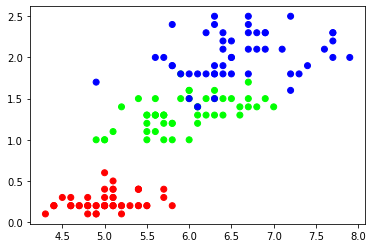

In [ ]:
plt.scatter(x=X[:, 0], y=X[:, 3], c=y, cmap=cmap)
plt.show();

In [ ]:
clf = KNN(k=3)
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 2, 1, 1, 1, 2, 2, 0])

In [ ]:
acc = np.sum(pred == y_test)/y_test.shape[0]

In [ ]:
acc

0.9333333333333333

## Linear Regression

1. Assumptions of LR
2. Lasso and ridge - read here: https://colab.research.google.com/drive/1mDSuiBb2LvtpMorp1nQuUg6GNmPGzZaC



![](https://i.imgur.com/TDkVmuG.jpeg)

In [ ]:
class LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None

    def loss(self, y, y_pred):
        """
        Loss : (y - X. theta)^T . (y - X.theta) where y_pred = X.theta
        """
        return np.dot((y-y_pred).T, (y-y_pred))[0][0]

    def fit(self, X, y):

        """
        X: training data : N x d
        y: true labels: N x 1
        """

        # 1 : append a column of 1 to X to turn this into a design matrix
        n_samples = X.shape[0]
        n_features = X.shape[1]
        all_ones = np.ones((n_samples, 1))

        X = np.concatenate((all_ones, X), axis=1)

        # 2: initialize theta as a vector of shape (d+1) x 1

        theta = np.zeros((n_features+1, 1))
        y_pred = np.dot(X, theta)
        loss_value = self.loss(y, y_pred)
        n_ = 0 ### counter tracking the number of iterations

        while loss_value > 1 and n_ < self.n_iters:

            y_pred = np.dot(X, theta)

            gradient = -X.T.dot(y - y_pred)

            theta = theta - self.lr * gradient

            loss_value = self.loss(y, y_pred)
            if n_%10 == 0:
                print (n_, loss_value)
            n_ += 1

        ### assign the trained wts
        self.theta = theta

    def predict(self, X):
        """
        Given a set of samples predict the values using trained wts
        """
        # 1 : append a column of 1 to X to turn this into a design matrix
        n_samples = X.shape[0]
        n_features = X.shape[1]
        all_ones = np.ones((n_samples, 1))

        X = np.concatenate((all_ones, X), axis=1)
        print (X.shape, self.theta.shape)
        if self.theta is None:
            return 'Please run .fit(X,y) before running prediction'

        return np.dot(X, self.theta).flatten()


In [ ]:
X = np.random.randint(low=0, high=9, size=(10, 4))
y = np.random.randint(low=0, high=9, size=(10, 1))



In [ ]:
linReg = LinearRegression(0.0001)
linReg.fit(X, y)

In [ ]:
y_pred = linReg.predict(X)

print (X.shape, y_pred.shape)

(10, 5) (5, 1)
(10, 4) (10,)


In [ ]:
# Load the diabetes dataset
diabetes_data = datasets.load_diabetes()

feature_names = diabetes_data['feature_names']
X, y = diabetes_data['data'], diabetes_data['target']

X = pd.DataFrame(data=X, columns=feature_names)
y = pd.DataFrame(data=y, columns=['Target'])

In [ ]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
linReg = LinearRegression(0.002, 10000)
linReg.fit(X.values, y.values)

## Logistic Regression

> Notes on the explanation by Andrew Ng: https://www.youtube.com/watch?v=-la3q9d7AKQ

Say we have a dataset of tumor size and whether the tumor is malignant (1) or not (0)

We can simply fit a st line through it using LinReg

and then we set a threshold on the y axis value

![](https://i.imgur.com/km28jFh.png)

But is this a good approach

Say we have an example way out to the right, now intuitively this should not change the decision boundary, but when we fit LinReg, the line will look different and the decision boundary if we chose the same threshold of 0.5 will change

![](https://i.imgur.com/tfU8Z2O.png)

So by adding a new example the decision boundary shifted and caused us to get a worse hypothesis

More on the problems of using regression for classification tasks: https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression

Also in LinReg the hypothesis can o/p values lesser than 0 or more than 1, which is counter-intuitive for classification

---

Logisic Regression model

We simply apply the sigmoid function to the hypothesis to transform it to a range bw 0->1

![](https://i.imgur.com/H7nBYXX.png)

#### Interpretation of hypothesis op

![](https://i.imgur.com/kGj8FQN.png)

![](https://i.imgur.com/4B5thwA.png)

![](https://i.imgur.com/RIeVlWu.jpeg)


#### Decision boundary

We want to analyze further when the hypothesis predicts a -ve or a +ve class

Say we set a threshold of 0.5, s.t whenever $h_{\theta}(x) \geq 0.5$ we predict `y = 1` and whenever $h_{\theta}(x) <  0.5$ we predict `y=0`

From the sigmoid curve we see that g(z) >= 0.5 whenever z > 0

Similarly as we have assumed for LogReg model that $z = \theta^Tx $, we can say that $h_{\theta}(x) = g(\theta^Tx) \geq 0.5$ when $\theta^Tx \geq 0$, so we predict y=1 whenever $\theta^Tx > 0$

![](https://i.imgur.com/mvToRcK.png)

Similarly we predict y=0 whenever z < 0, i.e when $\theta^Tx < 0$

We can use this iinfo to better understand the decision boundary of LogReg

Say we have:

![](https://i.imgur.com/f4KffDj.jpeg)

Now we have not discussed how to find these theta values but assume for now that they take the values (-3,1,1)

![](https://i.imgur.com/DbNdzaD.png)

Expanding on this, we can draw the db:

![](https://i.imgur.com/o1mSM0F.png)

Similarly for the region `x1+x2<3` we would predict y=0

The line separating the 2 classes is called the __decision boundary__

Also note that the db is a function of the theta values - we do not need the training set for plotting the db. of course the training set defines the values of theta, but the db itself can be determined once we have the theta values

#### Non linear desision boundaries

We can add higher order poly terms to LogReg to build complex dbs

![](https://i.imgur.com/B9QqZuZ.png)





#### Cost Function - Problems with the MSE cost function in LogReg

Let us understand how the theta values are actually computed

Before that let us define the problem:

![](https://i.imgur.com/96B9YOK.png)

Note here there are m training data points and n features for each example

For a single instance:

$\hat{y} = h_{\theta}(x) =\mathbf{sigmoid}(\theta^T_{(1\times n+1)}\cdot \mathbf{x}_{(1\times n+1)}) \rightarrow \mathit{scalar}$

#### Design matrix for LogReg

In LogReg we can build the design matrix by considering the each instance along the column, and appending a row of 1s at the start

`X -> (n+1) x m`

![](https://i.imgur.com/uNpljpb.jpeg)

Here we get the entire vector $h_{\theta}(X)$ as avector of shape 1 x m -> the hypothesis for each of the m training instances

Eah of these elemenets is a scalar



LinReg cost function:

![](https://i.imgur.com/o2g4xqU.png)

As we have m examples, we sum over m values and divide by m
This is the MSE loss in LinReg

But in LogReg $h_{\theta}(x)$ has a non-linearity, so it will be non-convex (having multiple local minima), so hard to optimize via Gradient Descent


![](https://i.imgur.com/CssA936.jpeg)

![](https://i.imgur.com/ZTEAUG4.png)





### Cost function used in LogReg

![](https://i.imgur.com/Oc4sBpL.png)

![](https://i.imgur.com/rtX9xwx.png)

Again here as y = 0 and we make the hypothesis of near 1 i.e P(y=1| x;theta)-> 1 then the cost is very high

If we make the hypothesis of near 0 i.e P(y=1| x;theta)-> 0 then the cost is very low (almost zero)

### Simplified Cost Function and Gradient Descent

What we have done till now:

![](https://i.imgur.com/PXGCTbG.png)

![](https://i.imgur.com/NppBbhq.png)

To conclude the cost function for LogReg:

![](https://i.imgur.com/HzXeAzM.png)

Why this particular cost function?

- This can be derived from a statistical approach using MLE as well
- It is convex, so convenient to optimize using GD

![](https://i.imgur.com/1e87ZCq.png)

The only task left is how to minimize this cost function




### Minimizing the Cost Function

![](https://i.imgur.com/CAs44n5.png)



## K-means clustering

> https://www.youtube.com/watch?v=0MQEt10e4NM
---

### Intuition

There are certain pts which are the centers of the clusters adn each pt in the cluster is near to one of the centers

Also in k-means we assume `K` clusters with centers u1,u2...uk

![](https://i.imgur.com/7DMhA1t.png)


### Mathematical formulation of Loss

For all points i in the data assigned to uj (cluster j) we can find the sum of distances to uj

We do this for all the clusters

Basically for each cluster j = 1 -> K, we take the points inside that cluser j and compute the distance from the center. This can be written as:

![](https://i.imgur.com/flZo9Rh.png)

We want to minimize this L

### Algorithm

K means iteratively tries to mimize L

1. Init the centers randomly (u1, u2, ... uk)
2. Now we have the centers, chose optimal `a` for fixed `u`
    - We just assign each pt to the nearest center
    ![](https://i.imgur.com/BZIG6Qg.png)
3. Chose optimal `u` for fixed `a`
    -
4. Repeat 2 and 3 until convergence

## Simple NN from scratch

> https://www.youtube.com/watch?v=tsqwvgHgwzs

---

### Setup

We want to build a simple NN with
- one i/p layer (2 nodes)
- one o/p layer (3 nodes) - 3 classes

![](https://imgur.com/ZeAYPz0.png)

![](https://imgur.com/w8BTe4N.png)

Note here we take one sample at a time for __X__

### Loss function

![](https://imgur.com/o2DxUzv.png)

In [ ]:
f